# Data visualisation

In [451]:
import os
import pandas as pd
import glob
import json
data_path = "../data/interim/v4"
test_cases = [file.split("-")[2] for file in glob.glob(f"{data_path}/*stage_5*.csv")]
# List test cases in dataset
for i,test_case in enumerate(test_cases):
    print(i,test_case)


0 milenkosRoomNearDevicesWithTraffic
1 milenkoParkWithTraffic
2 milenkosKitchenNotNearDevicesWithTraffic1
3 milenkosKitchenNotNearDevicesWithTraffic
4 milenkoParkWithTraffic1 
5 milenkosRoomNearDevicesWithTraffic1


In [452]:
# read all data in dataset
data_off = {test_case: pd.read_csv(glob.glob(f"{data_path}/*stage_5*{test_case}*")[0]) for test_case in test_cases}
data_on = {test_case: pd.read_csv(glob.glob(f"{data_path}/*stage_6*{test_case}*")[0]) for test_case in test_cases}

# extract one sample from data
i = 0
df_on = data_on[test_cases[i]]
df_off = data_off[test_cases[i]]

In [453]:
def add_intensity(df: pd.DataFrame):
    """
    add Intensity as 2nd norm of 3D vector
    """
    df["Intensity"] = (df["X_UnCal"] ** 2 + df["Y_UnCal"] ** 2 + df["Z_UnCal"] ** 2) ** 0.5

add_intensity(df_on)
add_intensity(df_off)
for key in data_off.keys():
    add_intensity(data_off[key])
for key in data_on.keys():
    add_intensity(data_on[key])

In [454]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,6002.000000,6002.000000,6002.000000,6002.000000,6.002000e+03,6.002000e+03,6.002000e+03
mean,21.485094,52.213347,-75.450035,94.258160,-1.987180e+01,4.759026e+01,-3.183421e+01
std,1.653482,0.533285,1.256461,0.739220,3.553010e-15,7.106019e-15,7.106019e-15
min,5.160600,47.933800,-86.803000,86.313807,-1.987180e+01,4.759026e+01,-3.183421e+01
25%,21.105999,51.938450,-75.871796,93.866747,-1.987180e+01,4.759026e+01,-3.183421e+01
50%,21.764800,52.240400,-75.383800,94.231456,-1.987180e+01,4.759026e+01,-3.183421e+01
75%,22.338200,52.545400,-74.859200,94.606753,-1.987180e+01,4.759026e+01,-3.183421e+01
max,26.144600,54.570600,-64.318400,99.915877,-1.987180e+01,4.759026e+01,-3.183421e+01


In [455]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,5998.000000,5998.000000,5998.000000,5998.000000,5.998000e+03,5998.000000,5.998000e+03
mean,18.273901,51.575754,-76.356628,93.948813,-1.987180e+01,47.590263,-3.183421e+01
std,1.208670,0.432664,0.892177,0.626693,3.553010e-15,0.000000,7.106020e-15
min,9.076799,49.068398,-83.545600,91.842454,-1.987180e+01,47.590263,-3.183421e+01
25%,17.531399,51.313198,-76.750200,93.567313,-1.987180e+01,47.590263,-3.183421e+01
50%,18.239000,51.581600,-76.311000,93.908219,-1.987180e+01,47.590263,-3.183421e+01
75%,19.068600,51.862198,-75.847400,94.276252,-1.987180e+01,47.590263,-3.183421e+01
max,21.752600,53.191998,-74.066200,98.699186,-1.987180e+01,47.590263,-3.183421e+01


# Trying statistical features

In [456]:
def statistical_features(df: pd.DataFrame, column_name='Intensity'):
    return df[column_name].describe().to_dict()
statistical_features(df_on)

{'count': 6002.0,
 'mean': 94.25815953846319,
 'std': 0.7392204317310728,
 'min': 86.31380671966681,
 '25%': 93.86674688067122,
 '50%': 94.23145584123205,
 '75%': 94.60675330570865,
 'max': 99.91587726682882}

In [457]:
columns = ['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']
data_on_statistics = {name: {column: statistical_features(df, column) for column in columns} for name, df in data_on.items()}
data_off_statistics = {name: {column: statistical_features(df, column) for column in columns} for name, df in data_off.items()}

## Best feature: standard diviation on intensity
- biggest difference when no devices nearby (park, even room without devices)

In [458]:
statistics = 'std'
# one of ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]
column = 'Intensity'
# one of ['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']


name_len = max([len(test_case) for test_case in test_cases])
print(f"Comparison of '{statistics}' statistic for {column} between modes in same test_session")
print(f"{'test_case':<{name_len}}  {'on':<8} {'off':<8} {'percentage diff'}")
print('-'*(35+name_len))
for test_case in test_cases:
    on = data_on_statistics[test_case][column][statistics]
    off = data_off_statistics[test_case][column][statistics]
    print(f"{test_case:<{name_len}} {on : .5f} {off : .5f} {(on - off) / on : .5f}")

Comparison of 'std' statistic for Intensity between modes in same test_session
test_case                                  on       off      percentage diff
----------------------------------------------------------------------------
milenkosRoomNearDevicesWithTraffic         0.73922  0.62669  0.15222
milenkoParkWithTraffic                     1.30874  0.85173  0.34920
milenkosKitchenNotNearDevicesWithTraffic1  1.07927  0.70414  0.34758
milenkosKitchenNotNearDevicesWithTraffic   1.07927  0.70414  0.34758
milenkoParkWithTraffic1                    1.32585  0.76795  0.42079
milenkosRoomNearDevicesWithTraffic1        0.73922  0.68290  0.07619


generate dataset from statistical features

In [459]:
start = 5000
size = 300

<AxesSubplot: title={'center': 'Stage All on'}>

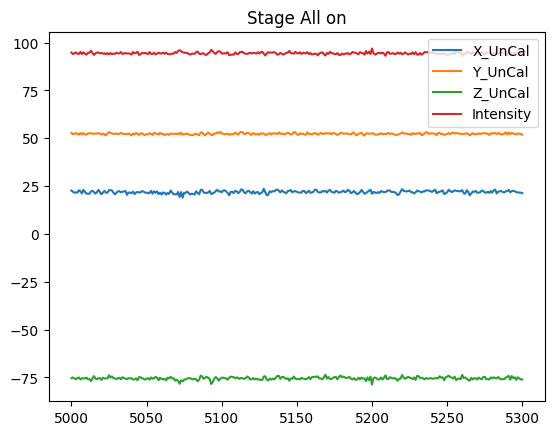

In [460]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All on")

<AxesSubplot: title={'center': 'Stage All off'}>

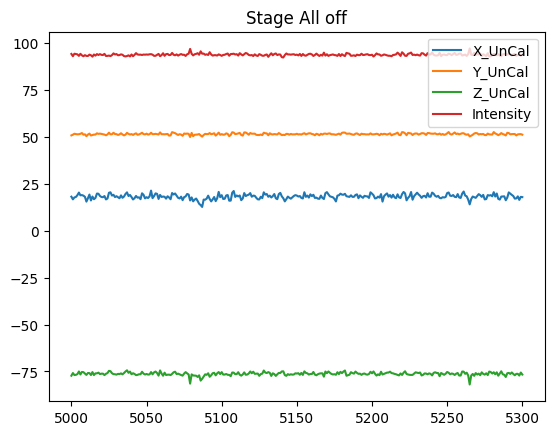

In [461]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All off")

# Fourier

## time and frequency
Timestamps are not reliable, also the difference is weird, so we will assume, data sampling ran for 60s (this was set in the app)

         fourier
bins            
1     191.572413
2       1.442996
3       1.303241
4       1.086511
5       1.021468
6       1.005611
7       1.055746
8       1.037853
9       1.115258
10      1.162652
11      0.916981
12      0.848160
13      0.798846
14      1.561656
15      0.982054
16      0.852480
17      0.884780
18      0.997978
19      0.938509
20      0.906749
21      0.869462
22      0.779860
23      1.205582
24      0.941054
25      0.868881
26      0.822718
27      0.809526
28      0.867641
29      0.696693
30      0.851269
31      0.758130
32      0.730454
33      0.730754
34      0.742481
35      0.834219
36      0.651718
37      0.715141
38      0.798016
39      0.835436
40      0.933334
41      0.793029
42      0.711896
43      0.726928
44      0.688633
45      0.688318
46      0.848151
47      0.763609
48      0.827807
49      0.695312
50      0.652669


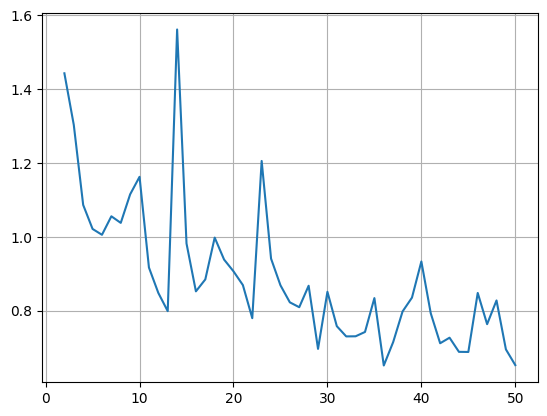

In [462]:
from scipy.fft import fft, fftfreq
import numpy as np
from matplotlib import pyplot as plt

def spectral_image(df: pd.DataFrame, column = 'Intensity', duration = 60):
    N = len(df)
    sampling_rate = N // duration
    T = 1 / sampling_rate

    yf = fft(df[column].to_numpy())

    # just right side
    yff = 2.0/N * np.abs(yf[0:N//2])
    xf = fftfreq(N, T)[:N//2]

    bins = np.array(range(round(xf[-1])))
    inds = np.digitize(xf, bins)
    df = pd.DataFrame({"bins": inds, "fourier": yff})
    groupped = df.groupby("bins").sum()
    return groupped


specter_intensity = spectral_image(df_on, 'Intensity', 60)
print(specter_intensity)
plt.plot(specter_intensity[1:])
plt.grid()
plt.show()

In [464]:
name = 'test'
label = 6
df = df_on
vec_len = 50
column = 'Intensity'
duration = 60
columns = ["Name", "Label"] + list(range(1,vec_len+1))

# loop
# set to constant 
def specter_to_data_row(name, label, df, vec_len, column = 'Intensity', duration = 60): 
    specter_intensity = spectral_image(df, column, duration)['fourier'].to_numpy()[:vec_len]
    padded = np.zeros((vec_len))
    padded[:specter_intensity.shape[0]] = specter_intensity
    data_row = [name, label] + list(padded)
    return data_row

data_on = pd.DataFrame([specter_to_data_row(name, 6, df, vec_len=50, column='Intensity') for name, df in data_on.items()], columns=columns)
data_off = pd.DataFrame([specter_to_data_row(name, 5, df, vec_len=50, column='Intensity') for name, df in data_off.items()], columns=columns)

#data_on.loc[:, df.columns != ]# .T.describe()
print(data_on[data_on.columns[3:]].T.describe())
print(data_off[data_off.columns[3:]].T.describe())


               0          1          2          3          4          5
count  49.000000  49.000000  49.000000  49.000000  49.000000  49.000000
mean    0.893025   1.220351   1.150313   1.150313   1.097393   0.893025
std     0.195256   0.535934   0.350518   0.350518   0.570855   0.195256
min     0.651718   0.000000   0.702297   0.702297   0.640157   0.651718
25%     0.758130   0.937687   0.951382   0.951382   0.821866   0.758130
50%     0.848160   1.108605   1.052556   1.052556   0.912999   0.848160
75%     0.982054   1.381943   1.191043   1.191043   1.089036   0.982054
max     1.561656   3.336085   2.626623   2.626623   3.678600   1.561656
               0          1          2          3          4          5
count  49.000000  49.000000  49.000000  49.000000  49.000000  49.000000
mean    0.809802   1.031391   0.904188   0.904188   0.935105   0.837627
std     0.181773   0.303577   0.217904   0.217904   0.291644   0.211602
min     0.000000   0.000000   0.000000   0.000000   0.000000   0

In [ ]:

data_fourier = data_on.append(data_off, ignore_index=True)
data_fourier = data_fourier.sort_values(by=['Label', 'Name'], ignore_index = True)
data_fourier

/tmp/ipykernel_65235/1856889821.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_fourier = data_on.append(data_off, ignore_index=True)


,Name,Label,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,milenkoParkWithTraffic,5,191.700170,1.455381,1.335105,1.068040,1.018518,1.051218,1.047058,1.043227,...,0.745215,0.662704,0.774697,0.690377,0.801237,0.808926,0.807390,0.725563,1.053758,0.000000
1,milenkoParkWithTraffic1,5,191.700170,1.455381,1.335105,1.068040,1.018518,1.051218,1.047058,1.043227,...,0.745215,0.662704,0.774697,0.690377,0.801237,0.808926,0.807390,0.725563,1.053758,0.000000
2,milenkosKitchenNotNearDevicesWithTraffic,5,191.700170,1.455381,1.335105,1.068040,1.018518,1.051218,1.047058,1.043227,...,0.745215,0.662704,0.774697,0.690377,0.801237,0.808926,0.807390,0.725563,1.053758,0.000000
3,milenkosKitchenNotNearDevicesWithTraffic1,5,191.700170,1.455381,1.335105,1.068040,1.018518,1.051218,1.047058,1.043227,...,0.745215,0.662704,0.774697,0.690377,0.801237,0.808926,0.807390,0.725563,1.053758,0.000000
4,milenkosRoomNearDevicesWithTraffic,5,191.700170,1.455381,1.335105,1.068040,1.018518,1.051218,1.047058,1.043227,...,0.745215,0.662704,0.774697,0.690377,0.801237,0.808926,0.807390,0.725563,1.053758,0.000000
5,milenkosRoomNearDevicesWithTraffic1,5,191.700170,1.455381,1.335105,1.068040,1.018518,1.051218,1.047058,1.043227,...,0.745215,0.662704,0.774697,0.690377,0.801237,0.808926,0.807390,0.725563,1.053758,0.000000
6,milenkoParkWithTraffic,6,191.700170,1.455381,1.335105,1.068040,1.018518,1.051218,1.047058,1.043227,...,0.745215,0.662704,0.774697,0.690377,0.801237,0.808926,0.807390,0.725563,1.053758,0.000000
7,milenkoParkWithTraffic1,6,191.572413,1.442996,1.303241,1.086511,1.021468,1.005611,1.055746,1.037853,...,0.793029,0.711896,0.726928,0.688633,0.688318,0.848151,0.763609,0.827807,0.695312,0.652669
8,milenkosKitchenNotNearDevicesWithTraffic,6,191.604336,1.443236,1.303458,1.086693,1.021638,1.005778,1.055922,1.038026,...,0.793161,0.712014,0.727049,0.688748,0.688432,0.848292,0.763736,0.827945,0.695427,0.644317
9,milenkosKitchenNotNearDevicesWithTraffic1,6,191.604336,1.443236,1.303458,1.086693,1.021638,1.005778,1.055922,1.038026,...,0.793161,0.712014,0.727049,0.688748,0.688432,0.848292,0.763736,0.827945,0.695427,0.644317


[ 2.82573996e+04 +0.j          6.50470309e-01 +0.26655358j
 -1.94910836e+01+18.69456159j -1.78497340e+00+12.31070853j
  6.60669675e+00 -6.49635665j -3.84932667e+00 -0.51091467j
 -2.41368990e+00 +0.02009903j  4.52101737e+00 -0.60176608j
  1.47717955e+01 -3.59821528j -5.27679643e+00 +6.20748958j
 -2.72114646e+00+17.77451822j  1.06083465e+01 +4.41064516j
 -4.86168548e+00 -0.28715222j -3.49513717e+00 +6.8231374j
  4.42724207e+00 -9.93937909j  4.14267229e-01 -8.35007854j
 -5.55730914e+00 +0.52312004j -6.76316092e+00 -3.71241369j
  1.42885503e+01 +0.0799261j   9.35673665e+00 -0.95288664j
  8.07627010e+00 +2.23594843j -5.19307607e+00 -8.38949022j
 -6.26583232e+00 -2.00135808j  2.03652218e+00-10.52963867j
 -1.00964545e+01 -8.39292542j -1.45715249e+00-10.35976015j
 -1.74500086e+00+15.72742562j -2.45568790e-01 -4.35358936j
  5.24565073e+00 +3.24234454j  7.99870093e+00 +5.62961556j
 -8.77578077e+00 -0.21166865j  9.73298651e+00 -7.33109137j
 -2.69912342e+00 -8.9283326j   3.02875984e+00 +5.9197276j

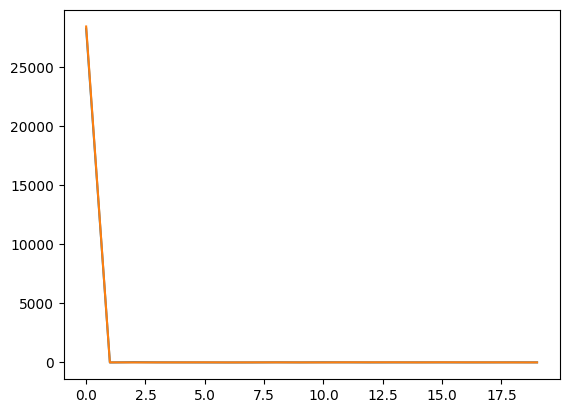

In [ ]:
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from matplotlib import pyplot as plt
import numpy as np
yf_off = rfft(df_off['Intensity'].loc[start:start+size].to_numpy())
yf_on = rfft(df_on['Intensity'].loc[start:start+size].to_numpy())
# print(yf_off)
# n of samples, spacing
print(yf_off)
#xf = rfftfreq(len(x), (x[1] - x[0]) / 1000)
plt.plot(np.abs(yf_off[:20]))
plt.plot(np.abs(yf_on[:20]))
plt.show()